In [2]:
%pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
data=pd.read_csv('insurance.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [7]:
data.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [8]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
data.shape

(1338, 7)

In [10]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:xlabel='expenses', ylabel='Count'>

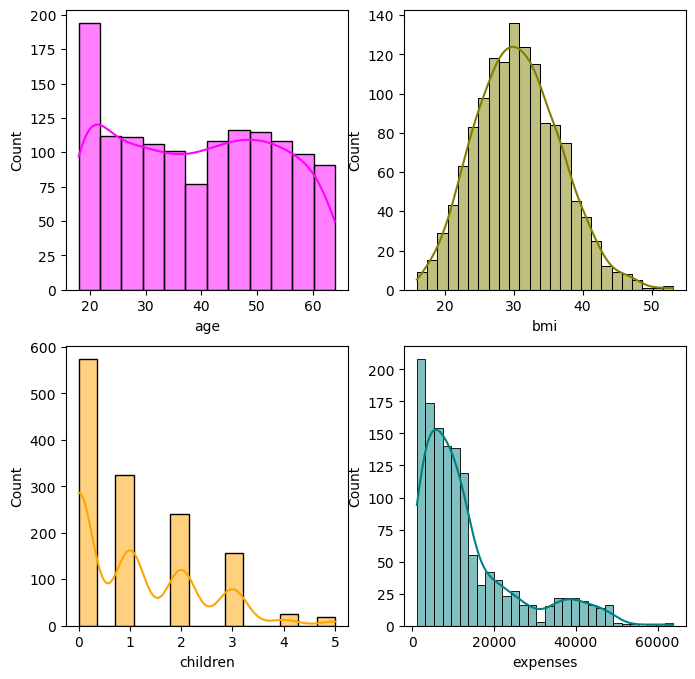

In [22]:
fig,axes=plt.subplots(2,2,figsize=(8,8))
sns.histplot(data=data,x='age',kde=True,color='Magenta',ax=axes[0,0])
sns.histplot(data=data,x='bmi',kde=True,color='Olive',ax=axes[0,1])
sns.histplot(data=data,x='children',kde=True,color='Orange',ax=axes[1,0])
sns.histplot(data=data,x='expenses',kde=True,color='Teal',ax=axes[1,1])

<Figure size 640x1800 with 0 Axes>

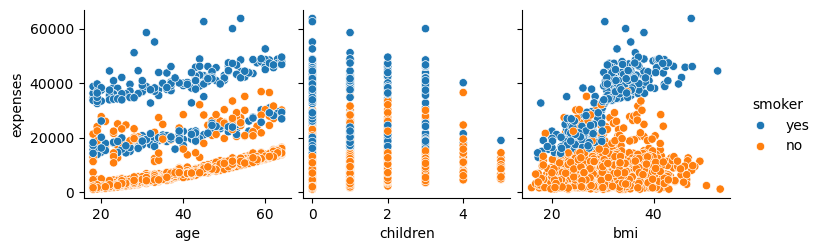

In [33]:
plt.figure().set_figheight(18)
sns.pairplot(data,x_vars=['age','children','bmi'],y_vars='expenses',hue='smoker',kind='scatter')
plt.show()

In [43]:
###converting string to integer
data=pd.get_dummies(data=data,columns=['sex','smoker','region'],drop_first=True)

In [44]:
data.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [45]:
x=data.drop('expenses',axis=1)
y=data.expenses

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=50)

In [50]:
train_df=pd.concat([y_train,x_train],axis=1)
train_df

,expenses,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1048,3594.17,25,22.5,1,0,0,1,0,0
45,20630.28,55,37.3,0,1,0,0,0,1
201,8871.15,48,32.2,1,0,0,0,1,0
153,19964.75,42,23.4,0,0,1,0,0,0
1251,1241.57,19,19.8,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
229,9225.26,47,25.5,2,1,0,0,0,0
70,16577.78,27,24.8,0,0,1,0,1,0
132,11163.57,53,35.9,2,0,0,0,0,1
1313,36397.58,19,34.7,2,0,1,0,0,1


In [51]:
import statsmodels.formula.api as sm

In [53]:
model1=sm.ols(formula="""expenses~age+bmi+children+smoker_yes+region_northwest+region_southwest+region_southwest""",data=train_df).fit()

In [55]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     503.6
Date:                Sat, 16 Mar 2024   Prob (F-statistic):          1.44e-306
Time:                        19:14:39   Log-Likelihood:                -10844.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.203e+04   1089.381    -11.040      0.000   -1.42e+04   -9889.110
age                253.0250     13.403     18.878      0.000     226.725     279.325
bmi                320.7890     30.679     10.456      0.000     260.591     380.987
children           426.3014    156.792      2.719      0.007     118.645     733.958
smoker_yes         2.35e+04    463.638     50.682      0.000    2.26e+04    2.44e+04
region_northwest   558.9061    467.513      1.195      0.232    -358.448    1476.260
region_southwest    46.7609    465.441      0.100      0.920    -866.526     960.048
==============================================================================
Omnibus:                      256.788   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.937
Skew:                           1.277   Prob(JB):                    8.87e-136
Kurtosis:                       5.726   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
%pip install plotly matplotlib seaborn --quiet

In [59]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'